<a href="https://colab.research.google.com/github/NathanPhilipB/Skin_Cancer_Classification_NATHANPHILIPB/blob/main/nathanphilipb_skin_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d bhanuprasanna/isic-2019

100% 9.08G/9.10G [00:50<00:00, 257MB/s]
100% 9.10G/9.10G [00:50<00:00, 194MB/s]


In [ ]:
! unzip /content/isic-2019.zip

Archive:  /content/isic-2019.zip
replace ISIC - 2019/test/Actinic keratosis/ISIC_0024468.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ISIC - 2019/test/Actinic keratosis/ISIC_0024470.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ISIC - 2019/test/Actinic keratosis/ISIC_0024646.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ISIC - 2019/test/Actinic keratosis/ISIC_0024654.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, applications
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler
import os

In [ ]:
os.mkdir('/content/small_data')

In [ ]:
import os
import random
import shutil

dataset_dir = '/content/ISIC - 2019'
train_dir = os.path.join(dataset_dir, 'train')
#small_train_dir = '/content/small_train'
small_train_dir = '/content/small_data/small_train'

subset_size = 74
random.seed(42)

os.makedirs(small_train_dir, exist_ok=True)

subclasses = os.listdir(train_dir)

for subclass in subclasses:
    subclass_dir = os.path.join(train_dir, subclass)
    small_train_subclass_dir = os.path.join(small_train_dir, subclass)
    os.makedirs(small_train_subclass_dir, exist_ok=True)

    image_files = os.listdir(subclass_dir)

    subset_files = random.sample(image_files, subset_size)

    for file in subset_files:
        src_path = os.path.join(subclass_dir, file)
        dst_path = os.path.join(small_train_subclass_dir, file)
        shutil.copyfile(src_path, dst_path)


In [ ]:
dataset_dir = '/content/ISIC - 2019'
val_dir = os.path.join(dataset_dir, 'val')
#small_val_dir = '/content/small_val'
small_val_dir = '/content/small_data/small_val'


subset_size = 22
random.seed(42)

os.makedirs(small_val_dir, exist_ok=True)

subclasses = os.listdir(val_dir)

for subclass in subclasses:
    subclass_dir = os.path.join(val_dir, subclass)
    small_val_subclass_dir = os.path.join(small_val_dir, subclass)
    os.makedirs(small_val_subclass_dir, exist_ok=True)

    image_files = os.listdir(subclass_dir)

    subset_files = random.sample(image_files, subset_size)

    for file in subset_files:
        src_path = os.path.join(subclass_dir, file)
        dst_path = os.path.join(small_val_subclass_dir, file)
        shutil.copyfile(src_path, dst_path)

# BALANCE


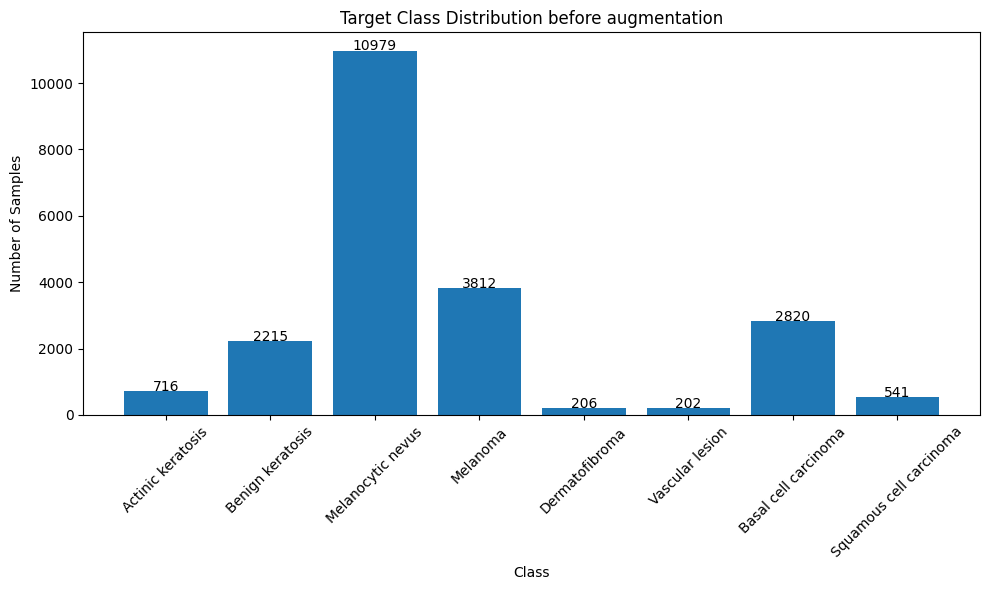

In [ ]:
import os
import matplotlib.pyplot as plt

dataset_dir = '/content/ISIC - 2019'
train_dir = os.path.join(dataset_dir, 'train')

class_subdirs = os.listdir(train_dir)

class_names = []
sample_counts = []

for class_subdir in class_subdirs:
    class_dir = os.path.join(train_dir, class_subdir)
    if os.path.isdir(class_dir):
        sample_count = len(os.listdir(class_dir))

        class_names.append(class_subdir)
        sample_counts.append(sample_count)

plt.figure(figsize=(10, 6))
plt.bar(class_names, sample_counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Target Class Distribution before augmentation')

for i, count in enumerate(sample_counts):
    plt.text(i, count + 10, str(count), ha='center')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import os
import glob
import random

def delete_images_randomly(directory, num_images_to_delete):
    # Get a list of all image files in the directory
    image_files = glob.glob(os.path.join(directory, "*.jpg"))

    # Check if the number of images to delete is within the available range
    num_images_to_delete = min(num_images_to_delete, len(image_files))

    # Shuffle the list of images randomly
    random.shuffle(image_files)

    # Delete the specified number of images
    for i in range(num_images_to_delete):
        try:
            os.remove(image_files[i])
            print(f"Deleted: {image_files[i]}")
        except OSError as e:
            print(f"Error deleting {image_files[i]}: {e}")

# Example usage
directory_to_clean = '/content/ISIC - 2019/train/Melanocytic nevus'

num_images_to_delete =  # Change this to the desired number of images to delete

delete_images_randomly(directory_to_clean, num_images_to_delete)


Deleted: /content/ISIC - 2019/train/Vascular lesion/image_0_8240.jpg
Deleted: /content/ISIC - 2019/train/Vascular lesion/image_0_4512.jpg
Deleted: /content/ISIC - 2019/train/Vascular lesion/image_0_5698.jpg
Deleted: /content/ISIC - 2019/train/Vascular lesion/image_0_8963.jpg
Deleted: /content/ISIC - 2019/train/Vascular lesion/ISIC_0065149.jpg
Deleted: /content/ISIC - 2019/train/Vascular lesion/image_0_8281.jpg
Deleted: /content/ISIC - 2019/train/Vascular lesion/image_0_1377.jpg
Deleted: /content/ISIC - 2019/train/Vascular lesion/image_0_5534.jpg
Deleted: /content/ISIC - 2019/train/Vascular lesion/image_0_5485.jpg
Deleted: /content/ISIC - 2019/train/Vascular lesion/image_0_2726.jpg
Deleted: /content/ISIC - 2019/train/Vascular lesion/image_0_9396.jpg
Deleted: /content/ISIC - 2019/train/Vascular lesion/image_0_2216.jpg
Deleted: /content/ISIC - 2019/train/Vascular lesion/image_0_3145.jpg
Deleted: /content/ISIC - 2019/train/Vascular lesion/image_0_4774.jpg
Deleted: /content/ISIC - 2019/trai

In [ ]:
import os
import cv2
import random
import keras.preprocessing.image
from tensorflow.keras.utils import array_to_img, img_to_array, load_img

# Define the path to the main dataset folder containing train, val, and test folders
main_folder = "/content/ISIC - 2019/train"

# Define the target number of images per class
target_count = 5000

# Function to perform data augmentation
def augment_images(src_folder, target_count):
    if not os.path.exists(src_folder):
        print(f"Folder {src_folder} does not exist.")
        return

    image_files = [f for f in os.listdir(src_folder) if f.endswith((".png", ".jpg", ".jpeg"))]
    total_images = len(image_files)

    datagen = ImageDataGenerator(
		rotation_range = 40,
		shear_range = 0.2,
		zoom_range = 0.2,
		horizontal_flip = True,
		brightness_range = (0.5, 1.5))

    while total_images < target_count:
        # Randomly select an image from the class folder
        random_image = random.choice(image_files)
        src_path = os.path.join(src_folder, random_image)

        # Read the image using OpenCV
        img = load_img(src_path)

        x = img_to_array(img)
        # Reshaping the input image
        x = x.reshape((1, ) + x.shape)

        # Generating and saving 5 augmented samples using the above defined parameters.
        i = 0
        total_images += 5
        for batch in datagen.flow(x, batch_size = 1, save_to_dir =src_folder, save_prefix ='image', save_format ='jpg'):
            i += 1
            if i > 5:
                break





# Function to process all classes in the main dataset folder
def process_classes(main_folder):
    class_folders = [os.path.join(main_folder, folder) for folder in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder, folder))]

    for class_folder in class_folders:
        class_images = [f for f in os.listdir(class_folder) if f.endswith((".jpg"))]
        images_count = len(class_images)
        if images_count < target_count:
            print(f"Augmenting images in class folder: {class_folder}")
            augment_images(class_folder, target_count)

# Process all classes in the main dataset folder
process_classes(main_folder)


Augmenting images in class folder: /content/ISIC - 2019/train/Actinic keratosis
Augmenting images in class folder: /content/ISIC - 2019/train/Squamous cell carcinoma
Augmenting images in class folder: /content/ISIC - 2019/train/Benign keratosis


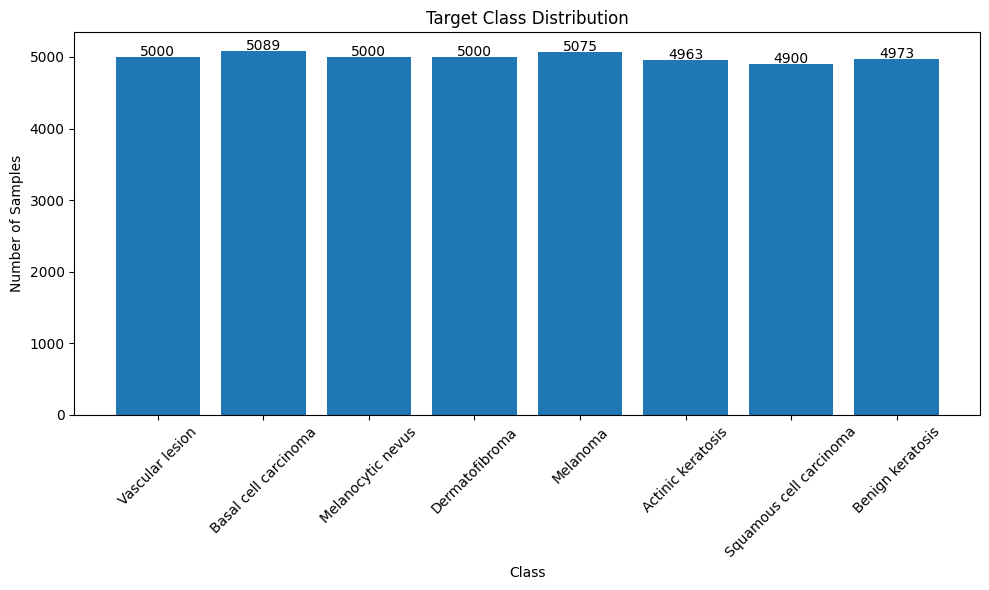

In [ ]:
import os
import matplotlib.pyplot as plt

dataset_dir = '/content/ISIC - 2019'
train_dir = os.path.join(dataset_dir, 'train')

class_subdirs = os.listdir(train_dir)

class_names = []
sample_counts = []

for class_subdir in class_subdirs:
    class_dir = os.path.join(train_dir, class_subdir)
    if os.path.isdir(class_dir):
        sample_count = len(os.listdir(class_dir))

        class_names.append(class_subdir)
        sample_counts.append(sample_count)

plt.figure(figsize=(10, 6))
plt.bar(class_names, sample_counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Target Class Distribution')

for i, count in enumerate(sample_counts):
    plt.text(i, count + 10, str(count), ha='center')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#PREPROCESSING


**DATA AUGMENTATION**

**CLAHE**

In [ ]:
import os
import cv2

# Define the path to the training dataset folder
train_folder = "path/to/train_folder"

# Function to apply CLAHE to an image
def apply_clahe(image_path):
    # Read the image using OpenCV
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Create a CLAHE object
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

    # Apply CLAHE to the image
    clahe_img = clahe.apply(img)

    return clahe_img

# Function to apply CLAHE to all images in a folder
def apply_clahe_to_folder(folder_path):
    if not os.path.exists(folder_path):
        print(f"Folder {folder_path} does not exist.")
        return

    # List all image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith((".png", ".jpg", ".jpeg"))]

    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        clahe_img = apply_clahe(image_path)

        # Save the CLAHE-enhanced image back to the same location
        cv2.imwrite(image_path, clahe_img)

# Apply CLAHE to the training dataset
apply_clahe_to_folder(train_folder)


**BLACK HAT FILTERING**

In [ ]:
import os
import cv2

def morph(image):
    grayScale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY )
    kernel = cv2.getStructuringElement(1,(17,17))
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
    ret,thresh2 = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
    dst = cv2.inpaint(image, thresh2,1,cv2.INPAINT_TELEA)
    return dst

def process_dataset(dataset_dir, output_dir):
    #for split in ['train', 'val', 'test']:
    for split in ['train', 'val']:
        split_dir = os.path.join(dataset_dir, split)

        for class_name in os.listdir(split_dir):
            class_dir = os.path.join(split_dir, class_name)
            output_class_dir = os.path.join(output_dir, split, class_name)

            os.makedirs(output_class_dir, exist_ok=True)

            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                output_image_path = os.path.join(output_class_dir, image_name)
                image = cv2.imread(image_path)
                hair_removed = morph(image)
                cv2.imwrite(output_image_path, hair_removed)

dataset_dir = '/content/ISIC - 2019/'
output_dir = '/content/ISIC - 2019_No-hair/'
#dataset_dir = '/content/small_data/'
#output_dir = '/content/small_data_blackhat/'
process_dataset(dataset_dir, output_dir)

KeyboardInterrupt: ignored

# ALEXNET

In [ ]:
IMAGE_SIZE=227
BATCH_SIZE=32
CHANNELS=3
EPOCHS=10

In [ ]:
train_data=tf.keras.preprocessing.image_dataset_from_directory(
    #'/content/ISIC - 2019/train',
    '/content/small_train',
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 384 files belonging to 8 classes.


In [ ]:
val_data=tf.keras.preprocessing.image_dataset_from_directory(
    #'/content/ISIC - 2019/val',
    '/content/small_val',
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 160 files belonging to 8 classes.


In [ ]:
test_data=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/ISIC - 2019/test',
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 1930 files belonging to 8 classes.


In [ ]:
class_names=train_data.class_names
class_names

['Actinic keratosis',
 'Basal cell carcinoma',
 'Benign keratosis',
 'Dermatofibroma',
 'Melanocytic nevus',
 'Melanoma',
 'Squamous cell carcinoma',
 'Vascular lesion']

In [ ]:
len(train_data)

12

In [ ]:
len(val_data)

5

In [ ]:
#for image_batch, label_batch in train_data.take(1):
for image_batch, label_batch in train_data:
  print(image_batch.shape)
  print(label_batch.numpy())

(32, 227, 227, 3)
[3 6 6 1 7 4 7 3 1 2 0 5 6 1 5 4 3 2 6 3 2 0 6 3 6 4 3 6 1 6 1 2]
(32, 227, 227, 3)
[1 0 6 6 1 4 3 1 1 3 7 2 5 1 7 2 7 6 6 0 1 2 6 3 7 0 4 5 4 5 6 0]
(32, 227, 227, 3)
[2 4 5 0 0 4 1 1 3 7 4 7 4 4 6 3 0 4 7 5 7 3 4 1 0 6 0 3 1 4 6 7]
(32, 227, 227, 3)
[3 5 6 5 1 2 4 3 7 5 4 1 2 7 4 7 2 7 0 4 6 5 1 5 2 1 1 5 7 7 1 0]
(32, 227, 227, 3)
[0 3 1 2 3 2 5 4 0 0 2 1 3 6 6 7 5 5 4 7 3 7 2 7 0 1 0 0 5 5 3 0]
(32, 227, 227, 3)
[2 6 6 7 7 4 3 5 2 5 1 6 3 2 5 2 3 1 3 5 2 2 6 4 4 1 5 5 3 4 0 6]
(32, 227, 227, 3)
[7 5 0 5 4 7 7 2 6 0 2 7 6 7 7 5 4 0 4 5 6 5 4 3 6 5 6 7 1 4 1 5]
(32, 227, 227, 3)
[0 2 7 7 2 5 4 7 4 1 7 3 5 0 1 5 0 7 5 7 2 0 3 2 6 4 1 6 1 4 3 0]
(32, 227, 227, 3)
[6 1 2 2 5 2 5 0 3 5 2 7 6 3 0 7 5 6 6 7 2 2 6 1 0 1 0 7 0 4 7 3]
(32, 227, 227, 3)
[2 0 3 4 4 7 0 1 3 2 6 0 0 0 1 1 2 2 7 4 3 5 1 3 4 5 4 4 6 5 4 0]
(32, 227, 227, 3)
[3 2 1 1 7 4 3 5 2 5 3 2 4 3 3 6 2 2 7 1 1 3 0 3 4 7 0 7 3 6 3 4]
(32, 227, 227, 3)
[1 7 0 0 2 5 5 0 1 4 3 6 0 6 5 1 4 2 6 3 0 2 0 2 2 3 1 6 6

In [ ]:
for image_batch, label_batch in train_data.take(1):
  print(image_batch[0].numpy())

[[[171.92358  172.04314  173.12494 ]
  [175.66924  174.56093  175.60406 ]
  [177.53304  177.47864  178.46696 ]
  ...
  [ 69.105095  61.59408   48.79441 ]
  [109.36938  100.85837   91.97253 ]
  [126.87489  119.38591  113.14151 ]]

 [[177.04405  173.5982   174.      ]
  [175.60902  174.87555  173.26651 ]
  [175.60019  175.15526  175.37773 ]
  ...
  [103.09625   95.42252   82.259384]
  [121.12434  114.58636  103.52024 ]
  [133.64626  126.157364 116.80455 ]]

 [[174.93527  174.93527  176.11014 ]
  [178.13269  178.13269  179.80635 ]
  [177.27196  176.39545  180.77754 ]
  ...
  [120.96351  111.96351  104.518684]
  [133.02148  123.18465  114.12535 ]
  [134.03925  127.03925  119.14802 ]]

 ...

 [[189.19702  183.19702  197.19702 ]
  [187.11902  184.95589  195.95589 ]
  [188.04955  185.39551  194.22252 ]
  ...
  [193.30823  196.30823  204.09894 ]
  [190.62961  194.62961  204.48895 ]
  [188.47859  196.3651   206.09843 ]]

 [[184.45175  180.45175  194.45175 ]
  [185.46204  181.46204  195.46204 ]


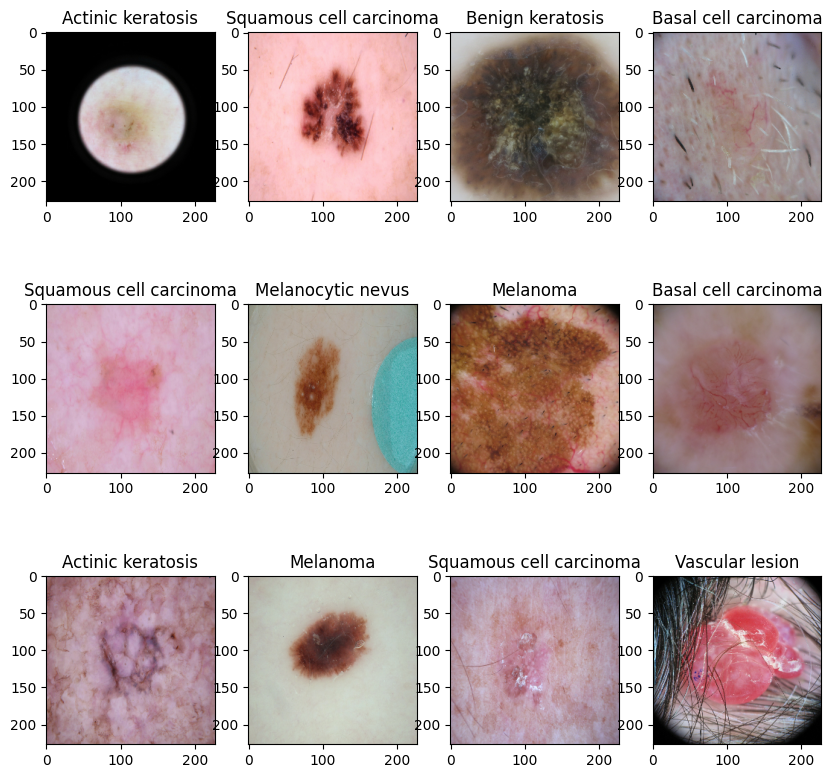

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in train_data.take(1):
  for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i].numpy()])

In [ ]:
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers

In [ ]:
model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    tensorflow.keras.layers.BatchNormalization(),
    tensorflow.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tensorflow.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tensorflow.keras.layers.BatchNormalization(),
    tensorflow.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tensorflow.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tensorflow.keras.layers.BatchNormalization(),
    tensorflow.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tensorflow.keras.layers.BatchNormalization(),
    tensorflow.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tensorflow.keras.layers.BatchNormalization(),
    tensorflow.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tensorflow.keras.layers.Flatten(),
    tensorflow.keras.layers.Dense(4096, activation='relu'),
    #tensorflow.keras.layers.Dropout(0.5),
    tensorflow.keras.layers.Dense(4096, activation='relu'),
    #tensorflow.keras.layers.Dropout(0.5),
    tensorflow.keras.layers.Dense(8, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                        

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train_data, epochs=EPOCHS, validation_data=val_data, callbacks=[tensorboard_callback])

Epoch 1/10
7/7 [==============================] - 94s 12s/step - loss: 55.0137 - accuracy: 0.1275 - val_loss: 45669.0195 - val_accuracy: 0.1181
Epoch 2/10
7/7 [==============================] - 80s 11s/step - loss: 8.4955 - accuracy: 0.1400 - val_loss: 2561.3672 - val_accuracy: 0.1250
Epoch 3/10
7/7 [==============================] - 83s 11s/step - loss: 2.9557 - accuracy: 0.1800 - val_loss: 1637.3429 - val_accuracy: 0.1250
Epoch 4/10
7/7 [==============================] - 80s 11s/step - loss: 2.9783 - accuracy: 0.1800 - val_loss: 338.0397 - val_accuracy: 0.1250
Epoch 5/10
7/7 [==============================] - 79s 11s/step - loss: 2.2680 - accuracy: 0.2325 - val_loss: 243.3791 - val_accuracy: 0.1319
Epoch 6/10
7/7 [==============================] - 83s 11s/step - loss: 2.0374 - accuracy: 0.2400 - val_loss: 119.1212 - val_accuracy: 0.1181
Epoch 7/10
7/7 [==============================] - 89s 12s/step - loss: 1.8420 - accuracy: 0.2725 - val_loss: 68.1733 - val_accuracy: 0.1181
Epoch 8/1

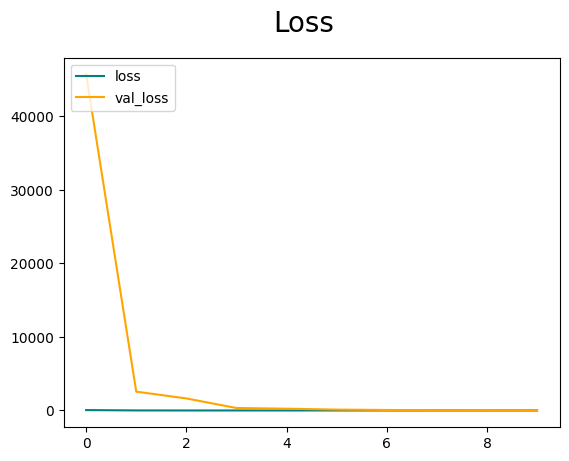

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

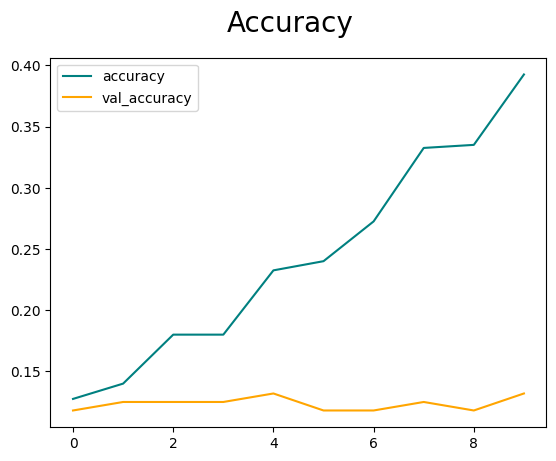

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
test_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 227, 227, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
for X, y in test_data:
    yhat=np.argmax(model.predict(X), axis=1)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 433ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.96378505, shape=(), dtype=float32) tf.Tensor(0.88948786, shape=(), dtype=float32) tf.Tensor(0.11450777, shape=(), dtype=float32)


# VGG19

In [ ]:
IMAGE_SIZE=224
BATCH_SIZE=32
CHANNELS=3
EPOCHS=10

In [ ]:
train_data=tf.keras.preprocessing.image_dataset_from_directory(
    #'/content/ISIC - 2019/train',
    '/content/small_train',
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 384 files belonging to 8 classes.


In [ ]:
val_data=tf.keras.preprocessing.image_dataset_from_directory(
    #'/content/ISIC - 2019/val',
    '/content/small_val',
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 160 files belonging to 8 classes.


In [ ]:
class_names=train_data.class_names
class_names

In [ ]:
len(train_data)

In [ ]:
len(val_data)

In [ ]:
for image_batch, label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

In [ ]:
for image_batch, label_batch in train_data.take(1):
  print(image_batch[0].numpy())

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in train_data.take(1):
  for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i].numpy()])

In [ ]:
from tensorflow.keras import applications, Model, optimizers
from tensorflow.keras.layers import Flatten, Dense

In [ ]:
base_model = applications.VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
predictions = Dense(8, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train_data, epochs=EPOCHS, validation_data=val_data, callbacks=[tensorboard_callback])

Epoch 1/10
12/12 [==============================] - 475s 39s/step - loss: 85.8471 - accuracy: 0.1328 - val_loss: 2.6226 - val_accuracy: 0.1875
Epoch 2/10
12/12 [==============================] - 442s 38s/step - loss: 3.9397 - accuracy: 0.3724 - val_loss: 2.5097 - val_accuracy: 0.2937
Epoch 3/10
12/12 [==============================] - 462s 39s/step - loss: 1.3971 - accuracy: 0.6146 - val_loss: 2.3873 - val_accuracy: 0.2875
Epoch 4/10
12/12 [==============================] - 466s 40s/step - loss: 0.7761 - accuracy: 0.7682 - val_loss: 2.4174 - val_accuracy: 0.3500
Epoch 5/10
12/12 [==============================] - 459s 39s/step - loss: 0.5849 - accuracy: 0.8464 - val_loss: 2.5201 - val_accuracy: 0.4125
Epoch 6/10
12/12 [==============================] - 462s 39s/step - loss: 0.2498 - accuracy: 0.9219 - val_loss: 3.0996 - val_accuracy: 0.3750
Epoch 7/10
12/12 [==============================] - 445s 38s/step - loss: 0.1794 - accuracy: 0.9427 - val_loss: 3.7737 - val_accuracy: 0.3250
Epoch

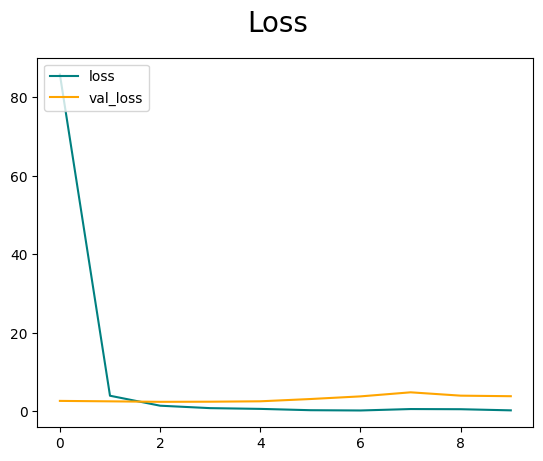

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

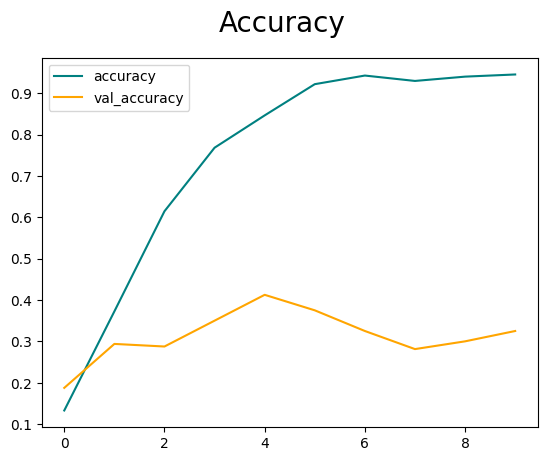

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
test_data

NameError: ignored

In [ ]:
for X, y in test_data:
    yhat=np.argmax(model.predict(X), axis=1)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(pre.result(), re.result(), acc.result())

# MOBILENET_V3_SMALL

In [ ]:
IMAGE_SIZE=224
BATCH_SIZE=32
CHANNELS=3
EPOCHS=10

In [ ]:
train_data=tf.keras.preprocessing.image_dataset_from_directory(
    #'/content/ISIC - 2019/train',
    '/content/small_train',
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 384 files belonging to 8 classes.


In [ ]:
val_data=tf.keras.preprocessing.image_dataset_from_directory(
    #'/content/ISIC - 2019/val',
    '/content/small_val',
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 160 files belonging to 8 classes.


In [ ]:
test_data=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/ISIC - 2019/test',
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 1930 files belonging to 8 classes.


In [ ]:
class_names=train_data.class_names
class_names

In [ ]:
len(train_data)

In [ ]:
len(val_data)

In [ ]:
#for image_batch, label_batch in train_data.take(1):
for image_batch, label_batch in train_data:
  print(image_batch.shape)
  print(label_batch.numpy())

In [ ]:
for image_batch, label_batch in train_data.take(1):
  print(image_batch[0].numpy())

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in train_data.take(1):
  for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i].numpy()])

In [ ]:
from tensorflow.keras import applications, Model, optimizers
from tensorflow.keras.layers import Flatten, Dense

In [ ]:
base_model = applications.MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(8, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_5 (Rescaling)        (None, 224, 224, 3)  0           ['input_6[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling_5[0][0]']            
                                )                                                                 
                                                                                            

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train_data, epochs=EPOCHS, validation_data=val_data, callbacks=[tensorboard_callback])

Epoch 1/10
12/12 [==============================] - 11s 524ms/step - loss: 2.1563 - accuracy: 0.1406 - val_loss: 2.0356 - val_accuracy: 0.2313
Epoch 2/10
12/12 [==============================] - 6s 436ms/step - loss: 1.9592 - accuracy: 0.2448 - val_loss: 1.9521 - val_accuracy: 0.2625
Epoch 3/10
12/12 [==============================] - 6s 370ms/step - loss: 1.8332 - accuracy: 0.3255 - val_loss: 1.8873 - val_accuracy: 0.2875
Epoch 4/10
12/12 [==============================] - 6s 366ms/step - loss: 1.7236 - accuracy: 0.3724 - val_loss: 1.8319 - val_accuracy: 0.3187
Epoch 5/10
12/12 [==============================] - 7s 455ms/step - loss: 1.6344 - accuracy: 0.4349 - val_loss: 1.7894 - val_accuracy: 0.3375
Epoch 6/10
12/12 [==============================] - 7s 452ms/step - loss: 1.5565 - accuracy: 0.4896 - val_loss: 1.7496 - val_accuracy: 0.3500
Epoch 7/10
12/12 [==============================] - 7s 450ms/step - loss: 1.4869 - accuracy: 0.5234 - val_loss: 1.7163 - val_accuracy: 0.3625
Epoch

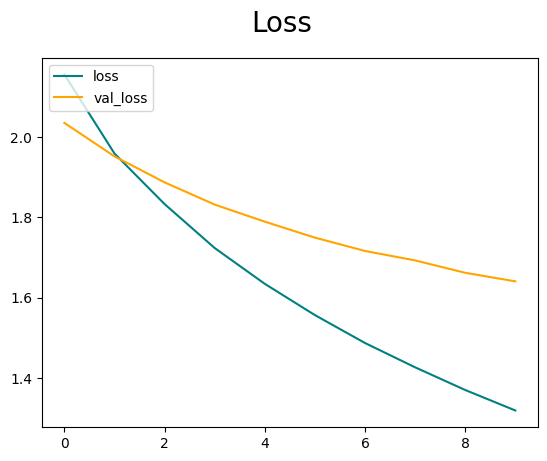

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

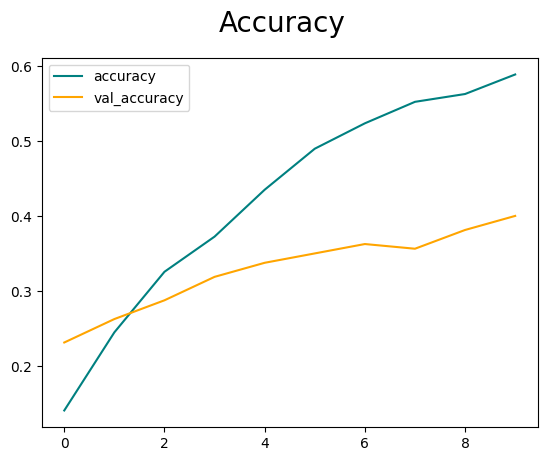

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
test_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
for X, y in test_data:
    yhat=np.argmax(model.predict(X), axis=1)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 746ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9696117, shape=(), dtype=float32) tf.Tensor(0.928841, shape=(), dtype=float32) tf.Tensor(0.11968912, shape=(), dtype=float32)


# EfficientNet B5

In [ ]:
IMAGE_SIZE=456
BATCH_SIZE=32
CHANNELS=3
EPOCHS=10

In [ ]:
base_model = applications.EfficientNetB5(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(8, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_9 (Rescaling)        (None, 224, 224, 3)  0           ['input_9[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_9[0][0]']            
 )                                                                                                
                                                                                            

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train_data, epochs=EPOCHS, validation_data=val_data, callbacks=[tensorboard_callback])

Epoch 1/10


In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
test_data

In [ ]:
for X, y in test_data:
    yhat=np.argmax(model.predict(X), axis=1)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(pre.result(), re.result(), acc.result())

# YOLOv8

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.6/605.6 kB 5.4 MB/s eta 0:00:00


# TRAIN

In [ ]:
!pip install yolov8

In [ ]:
! pip list

#TRAIN YOLOv8n/No Aug/No hair remove

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.6/605.6 kB 8.0 MB/s eta 0:00:00


In [ ]:
import os

from ultralytics import YOLO
model = YOLO("yolov8n-cls.pt")

results = model.train(data='/content/ISIC - 2019', epochs=10, imgsz=64)

ModuleNotFoundError: ignored

In [ ]:
import pandas as pd

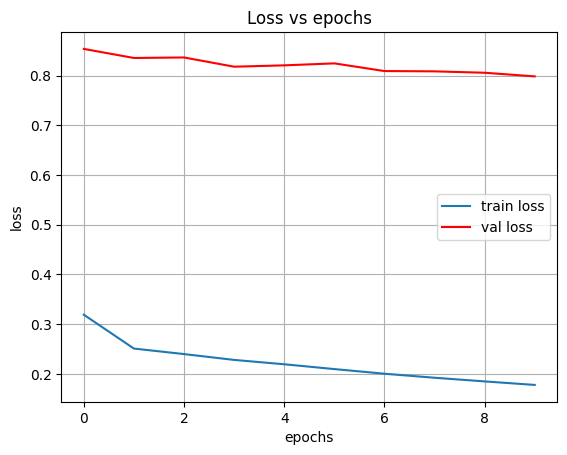

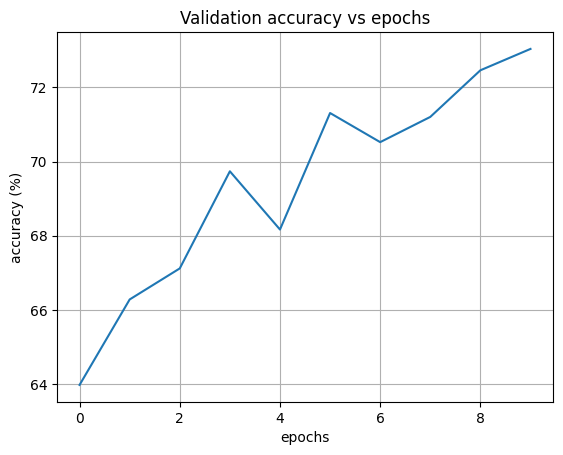

In [ ]:
results_path = '/content/runs/classify/train2/results.csv'

results = pd.read_csv(results_path)

plt.figure()
plt.plot(results['                  epoch'], results['             train/loss'], label='train loss')
plt.plot(results['                  epoch'], results['               val/loss'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()


plt.figure()
plt.plot(results['                  epoch'], results['  metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')

plt.show()

# VALIDATE

In [ ]:
#model = YOLO('path/to/best.pt')

metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.top1   # top1 accuracy
metrics.top5   # top5 accuracy

Ultralytics YOLOv8.0.145 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1445128 parameters, 0 gradients, 3.3 GFLOPs
               classes   top1_acc   top5_acc: 100%|██████████| 120/120 [00:29<00:00,  4.02it/s]
                   all       0.73      0.991
Speed: 0.0ms preprocess, 0.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val


0.990575909614563

#TRAIN YOLOv8m/no aug/no hair remove

In [ ]:
import os

from ultralytics import YOLO
model = YOLO("yolov8m-cls.pt")

100%|██████████| 32.7M/32.7M [00:00<00:00, 163MB/s]


In [ ]:
results = model.train(data='/content/ISIC - 2019', epochs=10, imgsz=64)

Ultralytics YOLOv8.0.145 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8m-cls.pt, data=/content/ISIC - 2019, epochs=10, patience=50, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False

In [ ]:
import pandas as pd

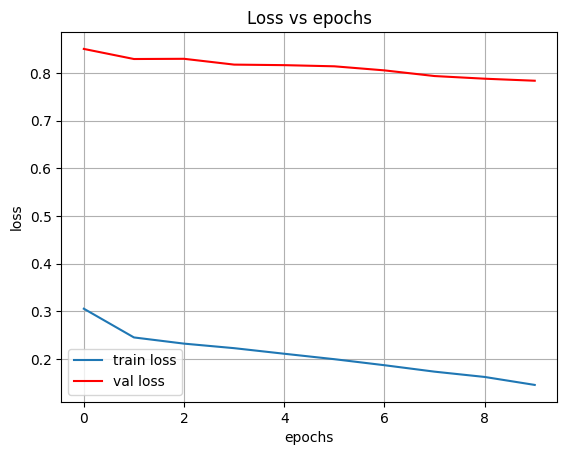

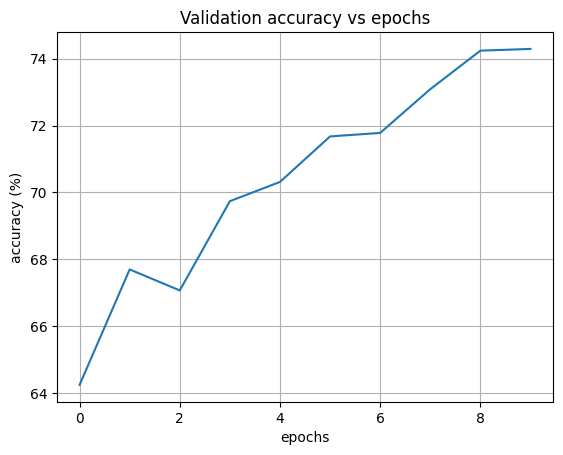

In [ ]:
results_path = '/content/runs/classify/train3/results.csv'

results = pd.read_csv(results_path)

plt.figure()
plt.plot(results['                  epoch'], results['             train/loss'], label='train loss')
plt.plot(results['                  epoch'], results['               val/loss'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()


plt.figure()
plt.plot(results['                  epoch'], results['  metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')

plt.show()

In [ ]:
#model = YOLO('path/to/best.pt')

metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.top1   # top1 accuracy
metrics.top5   # top5 accuracy

Ultralytics YOLOv8.0.145 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
               classes   top1_acc   top5_acc: 100%|██████████| 120/120 [00:27<00:00,  4.40it/s]
                   all      0.742      0.992
Speed: 0.0ms preprocess, 0.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val7


AttributeError: ignored

In [ ]:
metrics = model.val('/content/ISIC - 2019')

metrics

Ultralytics YOLOv8.0.145 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
               classes   top1_acc   top5_acc: 100%|██████████| 120/120 [00:28<00:00,  4.22it/s]
                   all      0.742      0.992
Speed: 0.0ms preprocess, 0.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val11


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a6c40573370>
fitness: 0.8667539358139038
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.7418848276138306, 'metrics/accuracy_top5': 0.991623044013977, 'fitness': 0.8667539358139038}
speed: {'preprocess': 0.02273314910409338, 'inference': 0.8252827908980285, 'loss': 0.0010914827516565772, 'postprocess': 0.004229246009706826}
top1: 0.7418848276138306
top5: 0.991623044013977

#TRAIN YOLOv8m/aug/no hair remove

In [ ]:
import os

from ultralytics import YOLO
model = YOLO("yolov8m-cls.pt")

ModuleNotFoundError: ignored

In [ ]:
results = model.train(data='/content/ISIC - 2019', epochs=10, imgsz=64)

NameError: ignored

In [ ]:
import pandas as pd

In [ ]:
results_path = '/content/runs/classify/train/results.csv'

results = pd.read_csv(results_path)

plt.figure()
plt.plot(results['                  epoch'], results['             train/loss'], label='train loss')
plt.plot(results['                  epoch'], results['               val/loss'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()


plt.figure()
plt.plot(results['                  epoch'], results['  metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')

plt.show()

FileNotFoundError: ignored

In [ ]:
#model = YOLO('path/to/best.pt')

metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.top1   # top1 accuracy
metrics.top5   # top5 accuracy

In [ ]:
metrics = model.val('/content/ISIC - 2019')

metrics

NameError: ignored

# TRAIN CUSTOMIZED YOLOv8

In [ ]:
!pip install ultralytics

In [ ]:
import os
import ultralytics
from ultralytics import YOLO

model = YOLO("yolov8n-cls.yaml")


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [ ]:
! pip list

In [ ]:
!pip show ultralytics

Name: ultralytics
Version: 8.0.145
Summary: Ultralytics YOLOv8 for SOTA object detection, multi-object tracking, instance segmentation, pose estimation and image classification.
Home-page: https://github.com/ultralytics/ultralytics
Author: Ultralytics
Author-email: hello@ultralytics.com
License: AGPL-3.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: matplotlib, opencv-python, pandas, pillow, psutil, py-cpuinfo, pyyaml, requests, scipy, seaborn, torch, torchvision, tqdm
Required-by: 


In [ ]:
import ultralytics as ul

In [ ]:
model = ul.models.YOLO("yolov8n-cls.yaml")


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [ ]:
!pip show ultralytics